# Question 2:
 Question 2 asks us to consider the dynamics of two molecules under the infulence of the Lennard-Jones potential. It asks us to use the Verlet Method which is as follows. 
 For the first step only,
 
\begin{equation}
    \vec { v } \left( t + \frac { 1 } { 2 } h \right) = \vec { v } ( t ) + \frac { 1 } { 2 } h \vec { f } ( \vec { r } ( t ) , t )
\tag{7}    
\end{equation}
the repeatedly apply the equations, 
\begin{equation}
\vec { r } ( t + h ) = \vec { r } ( t ) + h \vec { v } \left( t + \frac { 1 } { 2 } h \right)
\tag{8}    
\end{equation}
\begin{equation}
\vec { r } ( t + h ) = \vec { r } ( t ) + h \vec { v } \left( t + \frac { 1 } { 2 } h \right)
\tag{9}    
\end{equation}
\begin{equation}
\vec { k } = h f ( \vec { r } ( t + h ) , t + h )
\tag{10}    
\end{equation}
\begin{equation}
\vec { v } \left( t + \frac { 3 } { 2 } h \right) = \vec { v } \left( t + \frac { 1 } { 2 } h \right) + \vec { k }
\tag{11}
\end{equation}

### Equations of Motion
The equations of motion that we are using are as follows, 
The Lennard-Jones potential is 
\begin{equation}
V ( r ) = 4 e \left[ \left( \frac { \sigma } { r } \right) ^ { 12 } - \left( \frac { \sigma } { r } \right) ^ { 6 } \right]
\end{equation}
Now setting $\sigma$, mass of particle, and $\epsilon$ equal to 1. Then the force is 
F(r) = \frac{

### Q2 Part B
Pseudocode:
1. Define functions for x and y components of acceleration as found in part a) for each particle.
2. Instantiate variables N = 1000 steps and h = 0.001 step size, as well as initial conditions for velocity components for each particle (in this case all 0).
3. Definine initial conditions for position components as specified.
4. Preallocate memory to an empty arrays of length N to later store x and y components for position and velocity for each particle.
5. Store initial conditions for velocity and position components in the 0th index position of their respective arrays.
6. Implement equations 8-11 component-wise from lab manual with acceleration components mentioned in step 1 as the components of $\vec{f}$
7. In a for-loop from 2 to N-1 (since we index from zero this corresponds to N iterations in total) update values for trajectory and velocity components according to the series of equations 8-11 in the lab manual (Verlet method) and store the values at each iteration in the appropriate array that we instantiated in step 4. 


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# acceleration
def a1_x(x1, x2, y1, y2):
    r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)  # separation distance
    return 24 * (x2 - x1) * r**(-8) * (1 - 2 * r**(-6) )
def a1_y(x1, x2, y1, y2):
    r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)   # separation distance
    return 24 * (y2 - y1) * r**(-8) * (1 - 2 * r**(-6))
def a2_x(x1, x2, y1, y2):
    r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)   # separation distance
    return -24 * (x2 - x1) * r**(-8) * (1 - 2 * r**(-6) )
def a2_y(x1, x2, y1, y2):
    r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)    # separation distance
    return -24 * (y2 - y1) * r**(-8) * (1 - 2 * r**(-6) )

In [12]:
def doVerlet(r1_xi, r1_yi, r2_xi, r2_yi):
    '''
    Function: DoVerlet: This function performs the Verlet algorithim 
    in order to calculate the position of two particles. 
    Input: The positions of the particles. 
    '''


    N = 100
    h = 0.01

    v1_xi = 0.0
    v1_yi = 0.0
    v2_xi = 0.0
    v2_yi = 0.0

    r1_x = np.empty(N)
    r1_y = np.empty(N)
    v1_x = np.empty(N)
    v1_y = np.empty(N)
    r2_x = np.empty(N)
    r2_y = np.empty(N)
    v2_x = np.empty(N)
    v2_y = np.empty(N)
    
    v1_x[0] = v1_xi
    v1_y[0] = v1_yi
    v2_x[0] = v2_xi
    v2_y[0] = v2_yi
    r1_x[0] = r1_xi
    r1_y[0] = r1_yi
    r2_x[0] = r2_xi
    r2_y[0] = r2_yi

    #eq 7
    #variables with _prep suffix get updated at each iteration and represent
    #v(t+h/2) in Verlet algorithm (eq 8 - 11) in lab manual
    v1_x_prep = v1_x[0] + 0.5 * h * a1_x(r1_xi, r2_xi,r1_yi, r2_yi)
    v1_y_prep = v1_y[0] + 0.5 * h * a1_y(r1_xi, r2_xi,r1_yi, r2_yi)
    v2_x_prep = v2_x[0] + 0.5 * h * a2_x(r1_xi, r2_xi,r1_yi, r2_yi)
    v2_y_prep = v2_y[0] + 0.5 * h * a2_y(r1_xi, r2_xi,r1_yi, r2_yi)

    for i in range(1,N):
        #eq 8                                  
        r1_x[i] = r1_x[i-1] + h * v1_x_prep
        r1_y[i] = r1_y[i-1] + h * v1_y_prep
        r2_x[i] = r2_x[i-1] + h * v2_x_prep
        r2_y[i] = r2_y[i-1] + h * v2_y_prep
        # equation 10 
        v1_x[i] = v1_x_prep + 0.5 * h * a1_x(r1_x[i], r2_x[i], r1_y[i], r2_y[i])
        v1_y[i] = v1_y_prep + 0.5 * h * a1_x(r1_x[i], r2_x[i], r1_y[i], r2_y[i])
        v2_x[i] = v2_x_prep + 0.5 * h * a2_x(r1_x[i], r2_x[i], r1_y[i], r2_y[i])                 
        v2_y[i] = v2_y_prep + 0.5 * h * a2_y(r1_x[i], r2_x[i], r1_y[i], r2_y[i])
        #eq 9 and 11 combined
        v1_x_prep = v1_x_prep + h * a1_x(r1_x[i], r2_x[i], r1_y[i], r2_y[i])
        v1_y_prep = v1_y_prep + h * a1_y(r1_x[i], r2_x[i], r1_y[i], r2_y[i])
        v2_x_prep = v2_x_prep + h * a2_x(r1_x[i], r2_x[i], r1_y[i], r2_y[i])
        v2_y_prep = v2_y_prep + h * a2_y(r1_x[i], r2_x[i], r1_y[i], r2_y[i])
    t = np.linspace(0,h*(N-1),N)
    return v1_x, v1_y, v2_x, v2_y, r1_x, r1_y, r2_x, r2_y, t

In [13]:
#The different initial conditions for Part 2
#i)
r1_xi_a = 4
r1_yi_a = 4
r2_xi_a = 5.2
r2_yi_a = 4
v1_x_a, v1_y_a, v2_x_a, v2_y_a, r1_x_a, r1_y_a, r2_x_a, r2_y_a,t = \
doVerlet(r1_xi_a, r1_yi_a, r2_xi_a, r2_yi_a)
#ii)
r1_xi_b = 4.5
r1_yi_b = 4
r2_xi_b = 5.2
r2_yi_b = 4
v1_x_b, v1_y_b, v2_x_b, v2_y_b, r1_x_b, r1_y_b, r2_x_b, r2_y_b,t = \
doVerlet(r1_xi_b, r1_yi_b, r2_xi_b, r2_yi_b)
#iii)
r1_xi_c = 2
r1_yi_c = 3
r2_xi_c = 3.5
r2_yi_c = 4.4
v1_x_c, v1_y_c, v2_x_c, v2_y_c, r1_x_c, r1_y_c, r2_x_c, r2_y_c,t = \
doVerlet(r1_xi_c, r1_yi_c, r2_xi_c, r2_yi_c)

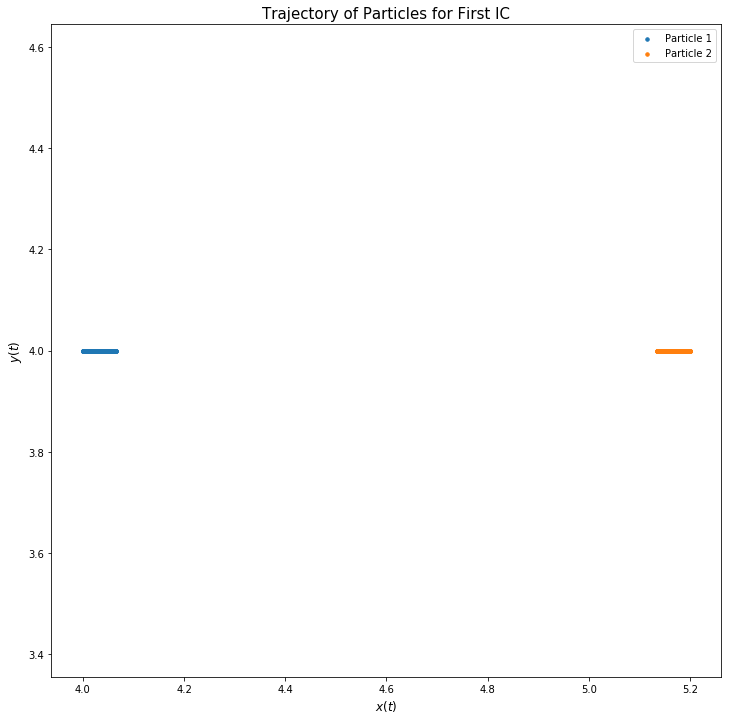

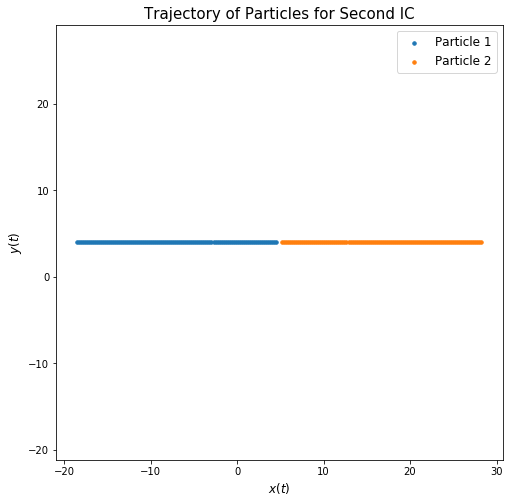

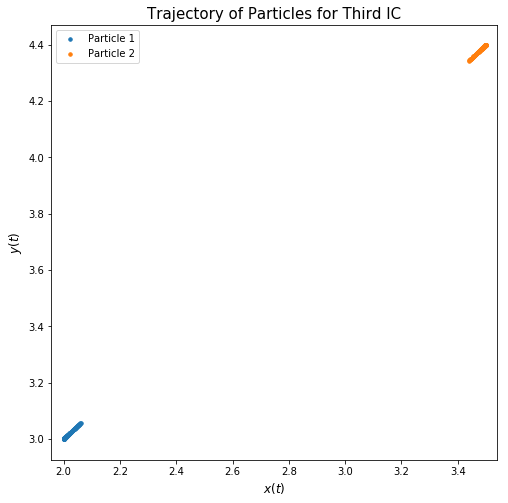

In [14]:
#plot trajectories
#i)
plt.figure(figsize = (12,12))
plt.title('Trajectory of Particles for First IC',fontsize = 15)
plt.xlabel('$x(t)$', fontsize = 12)
plt.ylabel('$y(t)$',fontsize = 12)
plt.scatter(r1_x_a, r1_y_a, s = 12,   label = 'Particle 1')
plt.scatter(r2_x_a, r2_y_a, s = 12, label = 'Particle 2')
plt.legend()
plt.axis('equal')
plt.show()
#ii)
plt.figure(figsize = (8,8))

plt.title('Trajectory of Particles for Second IC',fontsize = 15)
plt.xlabel('$x(t)$',fontsize = 12)
plt.ylabel('$y(t)$',fontsize = 12)
plt.scatter(r1_x_b, r1_y_b,  s = 12, label = 'Particle 1')
plt.scatter(r2_x_b, r2_y_b, s = 12, label = 'Particle 2')
plt.legend(fontsize = 12)
plt.axis('equal')
plt.show()
#iii)
plt.figure(figsize = (8,8))

plt.title('Trajectory of Particles for Third IC',fontsize = 15)
plt.xlabel('$x(t)$',fontsize = 12)
plt.ylabel('$y(t)$',fontsize = 12)
plt.scatter(r1_x_c, r1_y_c,  s = 12, label = 'Particle 1')
plt.scatter(r2_x_c, r2_y_c,  s = 12, label = 'Particle 2')
plt.legend()
plt.axis('equal')
plt.show()

Text(0.5,1,'First IC Xs with Respect to Time')

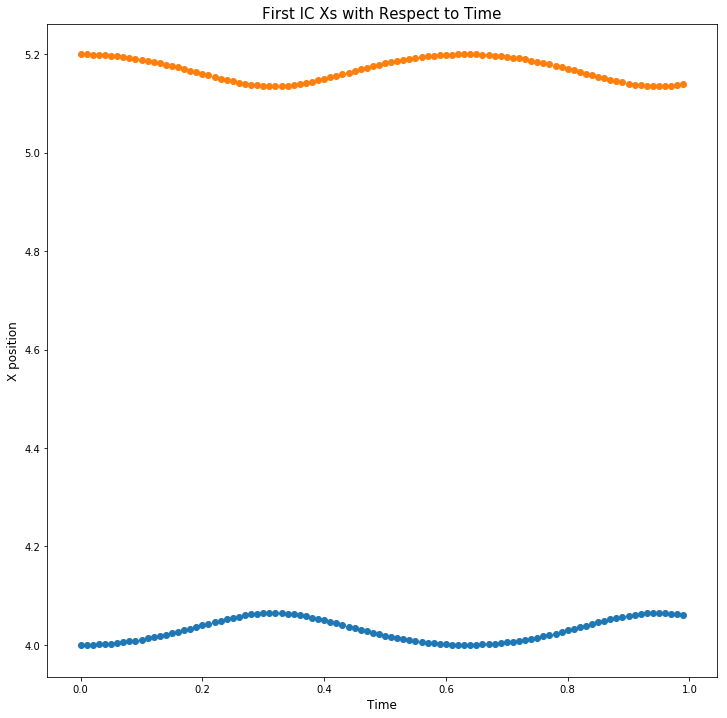

In [15]:
fig = plt.figure(figsize=(12,12))
plt.scatter(t,r1_x_a, label = 'First Particle')
plt.scatter(t,r2_x_a, label = 'Second Particle')
plt.xlabel('Time', fontsize = 12)
plt.ylabel('X position', fontsize = 12)


plt.title('First IC Xs with Respect to Time',fontsize = 15)